<a href="https://colab.research.google.com/github/practigol/trabajo_final/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de la pobreza en Argentina**

El objetivo de este trabajo es diseñar un modelo de aprendizaje automático que pueda predecir la pobreza en Argentina, a partir de los datos disponibles en la Encuesta Permanente de Hogares (https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos). 

Las bases de datos que se toman en este caso son las del último trimestre del año 2021.




In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

warnings.filterwarnings('ignore')

# **Creamos el dataset**

In [2]:
#cargamos el archivo de individuos "usu_individual_T421.csv"

from google.colab import files
uploaded  = files.upload() 

Saving usu_individual_T421.csv to usu_individual_T421.csv


In [3]:
df_individual = pd.read_csv("usu_individual_T421.csv")

In [4]:
df_individual.shape

(50154, 177)

In [5]:
# le asignamos un % a cada persona que vive en el hogar según género y edad, en la variable 'AE_ctrol_ind'

condiciones = [
    (df_individual ['CH04'] >= 1) & (df_individual['CH06'] < 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 1),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 2),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 3),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 4),
    (df_individual['CH04'] >= 1 ) & ( df_individual['CH06'] == 5),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 6),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 7),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 8),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 9),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 10),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 11),
    (df_individual['CH04'] >= 1) & (df_individual['CH06'] == 12),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 13) & (df_individual['CH06'] <=14),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 15) & (df_individual['CH06'] <=17),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 2) & (df_individual['CH06'] > 75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==10),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==11),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==12),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==13),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==14),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==15),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==16),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] ==17),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 18) & (df_individual['CH06'] <=29),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 30) & (df_individual['CH06'] <=45),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 46) & (df_individual['CH06'] <=60),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] >= 61) & (df_individual['CH06'] <=75),
    (df_individual['CH04'] == 1) & (df_individual['CH06'] > 75)   
    ]

opciones = [0.35,0.37,0.46,0.51,0.55,0.60,0.64,0.66,0.68,0.69,0.70,0.72,0.74,0.76,0.77,0.76,0.77,0.76,0.67,0.63,0.79,0.82,0.85,0.90,
            0.96,1.00,1.03,1.04,1.02,1.00,1.00,0.83,0.74]



In [6]:
df_individual['AE_ctrol_ind']=np.select(condiciones,opciones)

In [7]:
df_individual.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,AE_ctrol_ind
0,TQRMNOPPQHMOLPCDEGNFJ00714305,2021,4,1,4,1,44,N,17,309,...,7,33500.0,6,7.0,5,NaN,7.0,5,411,0.90
1,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,1,1,1,S,33,1573,...,4,32000.0,6,NaN,6,6.0,NaN,6,2285,0.74
2,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,2,1,1,S,33,1573,...,4,32000.0,6,NaN,6,6.0,NaN,6,2285,0.63
3,TQRMNOQYRHMOQRCDEIJAH00718661,2021,4,1,1,1,1,S,33,2635,...,12,0.0,12,NaN,12,12.0,NaN,12,0,1.00
4,TQRMNOPSTHMMLPCDEFMDB00713515,2021,4,1,2,1,43,N,6,87,...,7,43000.0,7,8.0,8,NaN,8.0,8,129,0.67


In [8]:
#seleccionamos solo las columnas que nos interesan para este estudio (ver archivo "EPH_registro_4T2021.pdf")

df_personas = df_individual[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH08','NIVEL_ED','CAT_OCUP','CAT_INAC','AE_ctrol_ind']]

In [9]:
df_personas.head()

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,1,13,1,3,0,3,0.90
1,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,1,79,1,2,0,1,0.74
2,TQRMNOQPYHKMPUCDEIJAH00663642,1,2,2,79,1,3,0,1,0.63
3,TQRMNOQYRHMOQRCDEIJAH00718661,1,1,1,48,1,4,3,0,1.00
4,TQRMNOPSTHMMLPCDEFMDB00713515,1,2,2,65,1,4,0,1,0.67


In [10]:
#sumamos el % de cada persona que compone el hogar (las variables CODUSU y NRO_HOGAR identifican a cada hogar)

df_suma = df_personas.groupby(['CODUSU','NRO_HOGAR']).AE_ctrol_ind.sum()

In [11]:
df_suma.head()

CODUSU                         NRO_HOGAR
TQRMNOPPQHJLKTCDEGNFJ00699079  1            1.40
TQRMNOPPQHJMKMCDEFKID00667054  1            1.77
TQRMNOPPQHJMKMCDEOJAH00697751  1            0.63
TQRMNOPPQHJMKTCDEHNHB00686535  1            2.19
TQRMNOPPQHJMLPCDEFNFF00670213  1            1.52
Name: AE_ctrol_ind, dtype: float64

In [12]:
df_suma.shape

(17037,)

In [13]:
#unimos los dos dataframes según las variables CODUSU y NRO_HOGAR

df_personas_suma = pd.merge(df_personas, df_suma, on=['CODUSU','NRO_HOGAR'])

In [14]:
df_personas_suma.head()

,CODUSU,NRO_HOGAR,CH03,CH04,CH06,CH08,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_x,AE_ctrol_ind_y
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,1,13,1,3,0,3,0.90,3.35
1,TQRMNOPPQHMOLPCDEGNFJ00714305,1,1,2,37,1,6,3,0,0.77,3.35
2,TQRMNOPPQHMOLPCDEGNFJ00714305,1,2,1,37,1,4,3,0,1.00,3.35
3,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,2,8,1,1,0,3,0.68,3.35
4,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,1,79,1,2,0,1,0.74,1.37


In [15]:
#renombramos las columnas

df_personas_suma = df_personas_suma.rename(columns={
     'CH03':'parentesco',
     'CH04':'genero',
     'CH06':'edad',
     'CH08':'cob_medica',
     'AE_ctrol_ind_x':'AE_ctrol_ind',
     'AE_ctrol_ind_y':'AE_ctrol_ind_sum'})

In [16]:
df_personas_suma.head(2)

,CODUSU,NRO_HOGAR,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,3,1,13,1,3,0,3,0.90,3.35
1,TQRMNOPPQHMOLPCDEGNFJ00714305,1,1,2,37,1,6,3,0,0.77,3.35


In [18]:
df_personas_suma.shape

(50154, 11)

In [19]:
#seleccionamos solo los que cumplen la condición de jefes/as de hogar

df_personas_jefes = df_personas_suma.loc[df_personas_suma.loc[:, 'parentesco'] == 1]

In [21]:
df_personas_jefes.head(2)

,CODUSU,NRO_HOGAR,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
1,TQRMNOPPQHMOLPCDEGNFJ00714305,1,1,2,37,1,6,3,0,0.77,3.35
4,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,1,79,1,2,0,1,0.74,1.37


In [22]:
#comprobamos la cantidad de filas

df_personas_jefes.shape

(17037, 11)

In [23]:
#cargamos el archivo de hogares "usu_hogar_T421.csv"

from google.colab import files
uploaded  = files.upload() 

Saving usu_hogar_T421.csv to usu_hogar_T421.csv


In [24]:
df_hogares = pd.read_csv("usu_hogar_T421.csv")

In [25]:
#comprobamos la cantidad de filas

df_hogares.shape

(17037, 88)

In [26]:
#unimos los dos dataframes, que tienen la misma cantidad de filas, según las variables CODUSU y NRO_HOGAR

df_dataset = pd.merge(df_hogares, df_personas_jefes, on=['CODUSU','NRO_HOGAR'])

In [27]:
#comprobamos la cantidad de filas

df_dataset.shape

(17037, 97)

In [28]:
df_dataset.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum
0,TQRMNOQRPHMOKOCDEOJAH00714382,2021,4,1,1,44,N,93,116,1,...,0,1,2,38,1,6,3,0,0.77,2.10
1,TQRMNOQYUHMMKPCDEOJAH00714383,2021,4,1,1,44,N,93,46,1,...,0,1,2,64,1,6,0,1,0.67,1.44


In [ ]:
#df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

In [29]:
#la variable ITF representa el monto de ingreso total familiar
#a este monto lo dividimos por la suma de % de las personas que residen en el hogar para obtener el ingreso por adulto equivalente

df_dataset['adulto_equivalente']= df_dataset.apply(lambda row: row.ITF/row.AE_ctrol_ind_sum, axis=1)

In [30]:
df_dataset['adulto_equivalente']= round(df_dataset['adulto_equivalente'], 0)

In [32]:
df_dataset.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente
0,TQRMNOQRPHMOKOCDEOJAH00714382,2021,4,1,1,44,N,93,116,1,...,1,2,38,1,6,3,0,0.77,2.10,0.0
1,TQRMNOQYUHMMKPCDEOJAH00714383,2021,4,1,1,44,N,93,46,1,...,1,2,64,1,6,0,1,0.67,1.44,0.0
2,TQRMNOPSWHMMKRCDEOJAH00714384,2021,4,1,1,44,N,93,43,1,...,1,1,72,1,2,0,1,0.83,1.50,51667.0
3,TQRMNOQYSHMNKTCDEOJAH00714386,2021,4,1,1,44,N,93,64,2,...,1,1,38,1,4,3,0,1.00,3.13,27157.0
4,TQRMNOQXVHLLPQCDEIJAH00718674,2021,4,1,1,1,S,33,2822,1,...,1,1,67,1,4,3,0,0.83,3.33,29090.0


In [33]:
#creamos la variable objetivo, pobreza

"""
De acuerdo con el archivo "canasta_01_22DEF7D4AE32.pdf", la canasta básica total para un adulto equivalente, para que 
no ingrese en la línea de pobreza, es de $24.643.

Creamos la varibale pobreza, donde todos los hogares que tengan ingresos menores a este valor son pobres. 
"""

df_dataset['pobreza'] = np.where(df_dataset['adulto_equivalente']<24643,1,0)


In [34]:
df_dataset['pobreza'].value_counts()

0    9197
1    7840
Name: pobreza, dtype: int64

In [35]:
df_dataset.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,TQRMNOQRPHMOKOCDEOJAH00714382,2021,4,1,1,44,N,93,116,1,...,2,38,1,6,3,0,0.77,2.10,0.0,1
1,TQRMNOQYUHMMKPCDEOJAH00714383,2021,4,1,1,44,N,93,46,1,...,2,64,1,6,0,1,0.67,1.44,0.0,1
2,TQRMNOPSWHMMKRCDEOJAH00714384,2021,4,1,1,44,N,93,43,1,...,1,72,1,2,0,1,0.83,1.50,51667.0,0
3,TQRMNOQYSHMNKTCDEOJAH00714386,2021,4,1,1,44,N,93,64,2,...,1,38,1,4,3,0,1.00,3.13,27157.0,0
4,TQRMNOQXVHLLPQCDEIJAH00718674,2021,4,1,1,1,S,33,2822,1,...,1,67,1,4,3,0,0.83,3.33,29090.0,0


In [36]:
df_dataset.to_csv('dataset.csv')

# **Cleaning**

In [ ]:
#from google.colab import files
#uploaded  = files.upload() 

Saving dataset.csv to dataset (1).csv


In [ ]:
#df_dataset = pd.read_csv("dataset.csv")

In [ ]:
#df_dataset = df_dataset.drop(['Unnamed: 0'], axis=1)

In [37]:
# vemos los nombres de las columnas
col_names = df_dataset.columns

col_names

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4', 'parentesco', 'genero', 'edad', 'cob_medica',
       'NIVEL_ED', 'CAT_OCUP', 'CAT_INAC', 'AE_ctrol_ind', 'AE_ctrol_ind_sum',
       'adulto

In [38]:
#la variable ITF representa el monto de ingreso total familiar
#analizamos sus datos

print(round(df_dataset['ITF'].describe()),2)

count      17037.0
mean       68734.0
std        77324.0
min            0.0
25%        22000.0
50%        56000.0
75%        95600.0
max      4035000.0
Name: ITF, dtype: float64 2


In [39]:
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

3582

In [40]:
#hay 3.582 hogares que declararon ingresos $0. 
#para este estudio no los vamos a tener en cuenta

df_dataset = df_dataset.drop(df_dataset[df_dataset['ITF']==0].index)

In [41]:
ITF_cero = [x for x in df_dataset['ITF'] if x == 0]
len(ITF_cero)

0

In [42]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13455 entries, 2 to 17036
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CODUSU              13455 non-null  object 
 1   ANO4                13455 non-null  int64  
 2   TRIMESTRE           13455 non-null  int64  
 3   NRO_HOGAR           13455 non-null  int64  
 4   REALIZADA           13455 non-null  int64  
 5   REGION              13455 non-null  int64  
 6   MAS_500             13455 non-null  object 
 7   AGLOMERADO          13455 non-null  int64  
 8   PONDERA             13455 non-null  int64  
 9   IV1                 13455 non-null  int64  
 10  IV1_ESP             29 non-null     object 
 11  IV2                 13455 non-null  int64  
 12  IV3                 13455 non-null  int64  
 13  IV3_ESP             27 non-null     object 
 14  IV4                 13455 non-null  int64  
 15  IV5                 13455 non-null  int64  
 16  IV6 

In [43]:
#de todas las columnas que indican localización dejamos solo Aglomerado
#también quitamos año, trimestre y realizada
#la variable de ponderación
#todos los deciles
#el % individual del jefe/a que reside en el hogar

df_dataset = df_dataset.drop(['ANO4','TRIMESTRE','REALIZADA','REGION','MAS_500','PONDERA','DECIFR','IDECIFR','RDECIFR','GDECIFR','PDECIFR','ADECIFR','IPCF','DECCFR','IDECCFR','RDECCFR','GDECCFR','PDECCFR','ADECCFR','PONDIH','AE_ctrol_ind'], axis=1)

In [44]:
df_dataset.shape

(13455, 78)

**Nulos**

In [45]:
pd.set_option('max_rows', 80)
pd.set_option('max_columns', 80)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 80)

In [46]:
nulos = df_dataset.isnull().sum()

In [47]:
nulos

CODUSU                    0
NRO_HOGAR                 0
AGLOMERADO                0
IV1                       0
IV1_ESP               13426
IV2                       0
IV3                       0
IV3_ESP               13428
IV4                       0
IV5                       0
IV6                       0
IV7                       0
IV7_ESP               13438
IV8                       0
IV9                       0
IV10                      0
IV11                      0
IV12_1                    0
IV12_2                    0
IV12_3                    0
II1                       0
II2                       0
II3                       0
II3_1                     0
II4_1                     0
II4_2                     0
II4_3                     0
II5                       0
II5_1                     0
II6                       0
II6_1                     0
II7                       0
II7_ESP               13436
II8                       0
II8_ESP               13348
II9                 

In [48]:
# vemos que las variables que tienen valores nulos son 
#IV1_ESP, IV3_ESP, IV7_ESP, II7_ESP, II8_ESP

#analizamos la cantidad que hay en cada una de ellas

df_dataset[['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP','II8_ESP']].notnull().sum()


IV1_ESP     29
IV3_ESP     27
IV7_ESP     17
II7_ESP     19
II8_ESP    107
dtype: int64

In [49]:
"""
La variable IV1 refiere al tipo de vivienda y tiene los valores desde el 1 al 6. 
Este último refiere a "otro" y en IV1_ESP se especifica la misma.

La variable IV3 identifica los pisos y va los valores desde el 1 al 4. 
Este último refiere a "otro" y en IV3_ESP se especifica la misma.

La variable IV7 es la fuente del agua y va del 1 al 4. 
Este último refiere a "otro" y en IV_ESP se especifica la misma.

a variable II7 es el régimen de tenencia de la propiedad y va del 1 al 9. 
Este último refiere a "otro" y en II7_ESP se especifica la misma.
"""
# dada la escasa cantidad de valores presentes en estas variables no las vamos a tener en cuenta en este estudio

df_dataset = df_dataset.drop(['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP'], axis=1)

In [50]:
df_dataset.shape

(13455, 74)

In [51]:
"""
La variable II8 es el combustible usado para cocina y va del 1 al 4. 
Este último refiere a "otro" y en II8_ESP se especifica la misma.
"""
# chequeamos cuántas veces aparece un valor en II8

df_dataset['II8'].value_counts()

1    8475
2    4822
4     107
3      40
0      11
Name: II8, dtype: int64

Vemos que hay filas con valores 0, los cuales vamos a cambiar por la mediana o la moda

In [52]:
df_dataset['II8_ESP'].value_counts()

ELECTRICIDAD                                     29
electricidad                                     25
ELECTRICO                                        17
ELECTRICA                                         6
cocina electrica                                  4
electrico                                         4
COCINA ELECTRICA                                  3
Electrica                                         2
electrica                                         2
COME EN LA CASA DE SU MADRE                       1
electricista                                      1
calentador                                        1
CALENTADOR ELECTRICO                              1
zepelin                                           1
UTILIZAR GAS DE RED EN OTRA VIVIENDA              1
utiliza la cocina de la madre                     1
NO COCINA SU FAMILIA LE ALCANZA LA COMIDA O L     1
olla electrica                                    1
electico                                          1
electricO   

In [53]:
condiciones = [
    (df_dataset['II8_ESP'] == 'ELECTRICIDAD') | (df_dataset['II8_ESP'] == 'electricidad') | (df_dataset['II8_ESP'] == 'ELECTRICO'),
    (df_dataset['II8_ESP'] == 'ELECTRICA') | (df_dataset['II8_ESP'] == 'cocina electrica') | (df_dataset['II8_ESP'] == 'electrico'),
    (df_dataset['II8_ESP'] == 'COCINA ELECTRICA') | (df_dataset['II8_ESP'] == 'Electrica') | (df_dataset['II8_ESP'] == 'electrica'),
    (df_dataset['II8_ESP'] == 'COME EN LA CASA DE SU MADRE'),
    (df_dataset['II8_ESP'] == 'electricista') | (df_dataset['II8_ESP'] == 'calentador') | (df_dataset['II8_ESP'] == 'CALENTADOR ELECTRICO'),
    (df_dataset['II8_ESP'] == 'zepelin'),
    (df_dataset['II8_ESP'] == 'UTILIZAR GAS DE RED EN OTRA VIVIENDA') | (df_dataset['II8_ESP'] == 'utiliza la cocina de la madre'),
    (df_dataset['II8_ESP'] == 'olla electrica') | (df_dataset['II8_ESP'] == 'electico') | (df_dataset['II8_ESP'] == 'electricO'),  
    (df_dataset['II8_ESP'] == 'garrafa a granel'),  
    (df_dataset['II8_ESP'] == 'electricidad '),  
    (df_dataset['II8_ESP'] == 'ANAFE') | (df_dataset['II8_ESP'] == 'NO COCINA'), 
    ]

opciones = [5,5,5,4,5,4,1,5,2,5,4]

In [54]:
df_dataset['II8_ESP']=np.select(condiciones,opciones)

In [55]:
condiciones8 = [
    (df_dataset['II8'] == 0),
    (df_dataset['II8'] == 1),
    (df_dataset['II8'] == 2),
    (df_dataset['II8'] == 3),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 0),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 1),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 2),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 4),
    (df_dataset['II8'] == 4) & (df_dataset['II8_ESP'] == 5)
   
    ]

opciones8 = [0,1,2,3,4,1,2,0,4]

In [56]:
df_dataset['II8']=np.select(condiciones8,opciones8)

In [57]:
df_dataset['II8'].value_counts()

1    8477
2    4823
4     100
3      40
0      15
Name: II8, dtype: int64

In [58]:
# borramos la variable II8_ESP

df_dataset = df_dataset.drop(['II8_ESP'], axis=1)

**Variables numéricas**

In [59]:
#Analizamos las variables numéricas

numerical = [var for var in df_dataset.columns if df_dataset[var].dtype!='O']
# view summary statistics in numerical variables
print(round(df_dataset[numerical].describe()),2)

       NRO_HOGAR  AGLOMERADO      IV1      IV2      IV3      IV4      IV5  \
count    13455.0     13455.0  13455.0  13455.0  13455.0  13455.0  13455.0   
mean         1.0        25.0      1.0      3.0      1.0      3.0      1.0   
std          2.0        20.0      0.0      1.0      0.0      2.0      0.0   
min          1.0         2.0      1.0      1.0      1.0      1.0      1.0   
25%          1.0        12.0      1.0      2.0      1.0      1.0      1.0   
50%          1.0        22.0      1.0      3.0      1.0      2.0      1.0   
75%          1.0        32.0      1.0      4.0      1.0      4.0      1.0   
max         72.0        93.0      6.0     99.0      4.0      9.0      2.0   

           IV6      IV7      IV8      IV9     IV10     IV11   IV12_1   IV12_2  \
count  13455.0  13455.0  13455.0  13455.0  13455.0  13455.0  13455.0  13455.0   
mean       1.0      1.0      1.0      1.0      1.0      1.0      2.0      2.0   
std        0.0      0.0      0.0      0.0      0.0      1.0    

In [60]:
#analizamos la mediana

df_dataset[numerical].median()

NRO_HOGAR                 1.00
AGLOMERADO               22.00
IV1                       1.00
IV2                       3.00
IV3                       1.00
IV4                       2.00
IV5                       1.00
IV6                       1.00
IV7                       1.00
IV8                       1.00
IV9                       1.00
IV10                      1.00
IV11                      1.00
IV12_1                    2.00
IV12_2                    2.00
IV12_3                    2.00
II1                       3.00
II2                       2.00
II3                       2.00
II3_1                     0.00
II4_1                     1.00
II4_2                     2.00
II4_3                     2.00
II5                       2.00
II5_1                     0.00
II6                       2.00
II6_1                     0.00
II7                       1.00
II8                       1.00
II9                       1.00
V1                        1.00
V2                        2.00
V21     

In [61]:
#analizamos la moda

df_dataset[numerical].mode()

,NRO_HOGAR,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV9,IV10,IV11,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II4_1,II4_2,II4_3,II5,II5_1,II6,II6_1,II7,II8,II9,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza
0,1,33,1,3,1,4,1,1,1,1,1,1,1,2,2,2,3,1,2,0,1,2,2,2,0,2,0,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,0,2,50000,1,0,98,0,0,0,1,1,50,1,4,3,0,1.0,50000.0,0


**Columnas que tienen valores 0 (que no corresponde)**

In [62]:
# buscamos las variables que tienen como mínimo 0

minimo_cero = [var for var in df_dataset.columns if df_dataset[var].min() == 0]

print('Hay {} variables con mínimo cero\n'.format(len(minimo_cero)))

print('Las variables con mínimo cero son:', minimo_cero)

Hay 25 variables con mínimo cero

Las variables con mínimo cero son: ['IV9', 'IV10', 'IV11', 'II1', 'II2', 'II3', 'II3_1', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'IX_MEN10', 'VII1_2', 'VII2_2', 'VII2_3', 'VII2_4', 'CAT_OCUP', 'CAT_INAC', 'pobreza']


In [63]:
"""
De éstas, las variables que no deberían tener valores = 0 son:
'IV9', 'IV10', 'IV11'
'II4_1', 'II4_2', 'II4_3'
'II5'
'II6'
'II7', 'II8', 'II9'
'CAT_OCUP' (en esta el 9 equivale a Ns/Nc)
"""

#cambiamos el 0 por 9 en CAT_OCUP

df_dataset['CAT_OCUP'] = df_dataset['CAT_OCUP'].replace([0],9)


In [64]:
df_dataset['CAT_OCUP'].value_counts()

3    6107
9    4932
2    2042
1     364
4      10
Name: CAT_OCUP, dtype: int64

In [65]:
# las seleccionamos (excepto CAT_OCUP)

minimo_cero = df_dataset[['CODUSU','NRO_HOGAR','IV9','IV10','IV11','II4_1','II4_2','II4_3','II5','II6','II7','II8','II9']]

In [66]:
(minimo_cero==0).sum()

CODUSU         0
NRO_HOGAR      0
IV9           41
IV10          41
IV11          41
II4_1         11
II4_2         11
II4_3         11
II5          815
II6          815
II7           11
II8           15
II9           11
dtype: int64

In [67]:
minimo_cero.median()

NRO_HOGAR    1.0
IV9          1.0
IV10         1.0
IV11         1.0
II4_1        1.0
II4_2        2.0
II4_3        2.0
II5          2.0
II6          2.0
II7          1.0
II8          1.0
II9          1.0
dtype: float64

In [68]:
minimo_cero.mode()

,CODUSU,NRO_HOGAR,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,TQRMNORSYHLNLTCDEHJGH00717147,1,1,1,1,1,2,2,2,2,1,1,1


In [69]:
#reemplazamos los valores cero por la moda

for x in minimo_cero.columns:
  minimo_cero[x] = minimo_cero[x].replace([0],minimo_cero[x].mode())  

In [70]:
minimo_cero.describe()

,NRO_HOGAR,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000,13455.000000
mean,1.081011,1.028614,1.040654,1.248086,1.087402,1.546265,1.677220,1.994649,1.990115,1.936455,1.386696,1.039391
std,1.564948,0.167170,0.206330,0.536458,0.282434,0.497873,0.467557,0.072958,0.098933,1.602331,0.536398,0.269494
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,72.000000,3.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,4.000000,4.000000


In [72]:
#borramos las columnas que corregimos del dataset

df_dataset = df_dataset.drop(['IV9','IV10','IV11','II4_1','II4_2','II4_3','II5','II6','II7','II8','II9'], axis=1)

KeyError: ignored

In [73]:
#unimos el dataset con las columnas corregidas, por CODUSU y NRO HOGAR

df_dataset_corregido = pd.merge(df_dataset, minimo_cero, on=['CODUSU','NRO_HOGAR']) 

In [74]:
df_dataset_corregido.head()

,CODUSU,NRO_HOGAR,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,TQRMNOPSWHMMKRCDEOJAH00714384,1,93,1,3,1,1,1,1,1,1,2,2,2,3,1,2,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,0,2,77500,1,2,98,0,0,0,1,1,72,1,2,9,1,1.50,51667.0,0,1,1,1,1,1,2,2,2,1,1,1
1,TQRMNOQYSHMNKTCDEOJAH00714386,1,93,2,2,1,4,1,1,1,1,2,2,2,2,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,4,1,3,85000,2,0,98,0,0,0,1,1,38,1,4,3,0,3.13,27157.0,0,1,1,1,1,2,2,2,2,6,1,1
2,TQRMNOQXVHLLPQCDEIJAH00718674,1,33,1,3,1,4,1,1,1,1,2,2,2,3,3,2,0,0,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,2,2,4,0,4,96870,1,2,98,0,0,0,1,1,67,1,4,3,0,3.33,29090.0,0,1,2,3,1,1,2,2,2,1,1,1
3,TQRMNORWPHLKPRCDEIJAH00718675,1,33,2,2,1,9,1,1,1,1,2,1,2,2,1,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,0,2,90000,1,2,98,0,0,0,1,1,35,1,5,3,0,1.77,50847.0,0,1,1,1,1,2,1,2,2,1,1,1
4,TQRMNOPWQHKLOUCDEIJAH00714088,1,33,1,3,1,1,1,1,1,1,2,2,2,3,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,3,0,3,92000,2,1,98,0,0,0,1,2,33,1,6,3,0,2.54,36220.0,0,1,1,1,1,1,1,2,2,1,1,1


**Outliers**

In [75]:
#En análisis de las variables numéricas vimos que IV2 e II1 tienen un máximo que quizás esté fuera de rango

#IV2 es la cantidad de habitaciones por hogar

df_dataset_corregido['IV2'].value_counts()

3     4971
2     3237
4     2856
1     1089
5      904
6      280
7       78
8       28
9        6
10       3
21       1
99       1
13       1
Name: IV2, dtype: int64

Text(0.5, 1.0, 'Boxplot de cantidad de ambientes por hogar')

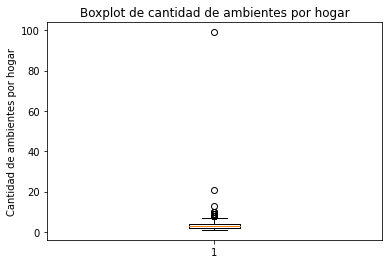

In [76]:
plt.boxplot(df_dataset_corregido['IV2'])
plt.ylabel("Cantidad de ambientes por hogar")
plt.title("Boxplot de cantidad de ambientes por hogar")

In [77]:
#acotamos el rango de 1 a 10

df_dataset_corregido['IV2'] = df_dataset_corregido['IV2'].clip(lower=1,upper = 10)

In [78]:
df_dataset_corregido['IV2'].describe()

count    13455.000000
mean         3.046005
std          1.188822
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: IV2, dtype: float64

In [79]:
#II1 es la cantidad de habitaciones que usan para dormir por hogar

df_dataset_corregido['II1'].value_counts()

3     4937
2     3303
4     2780
1     1190
5      878
6      251
7       70
8       22
0       11
9        7
10       3
47       1
42       1
13       1
Name: II1, dtype: int64

Text(0.5, 1.0, 'Boxplot de cantidad de ambientes que usan para dormir por hogar')

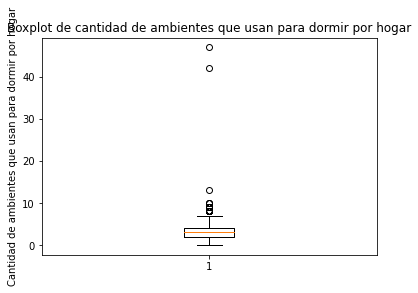

In [80]:
plt.boxplot(df_dataset_corregido['II1'])
plt.ylabel("Cantidad de ambientes que usan para dormir por hogar")
plt.title("Boxplot de cantidad de ambientes que usan para dormir por hogar")

In [81]:
#acotamos el rango de 1 a 10

df_dataset_corregido['II1'] = df_dataset_corregido['II1'].clip(lower=1,upper = 10)

In [82]:
df_dataset_corregido['II1'].describe()

count    13455.000000
mean         3.004311
std          1.184414
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: II1, dtype: float64

In [83]:
df_dataset_corregido.to_csv('dataset_corregido.csv')

# **Modelo**

**Experimento 1:**
en esta primera instancia implementaremos una regresión logística


In [84]:
# Buscamos las variables categóricas

categorical = [var for var in df_dataset_corregido.columns if df_dataset_corregido[var].dtype=='O']

print('Hay {} variables categóricas\n'.format(len(categorical)))

print('Las variables categórica son:', categorical)

Hay 1 variables categóricas

Las variables categórica son: ['CODUSU']


In [85]:
#borramos CODUSU y Nro de hogar
df = df_dataset_corregido.drop(['CODUSU','NRO_HOGAR'], axis=1)

In [86]:
df.head()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,93,1,3,1,1,1,1,1,1,2,2,2,3,1,2,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,0,2,77500,1,2,98,0,0,0,1,1,72,1,2,9,1,1.50,51667.0,0,1,1,1,1,1,2,2,2,1,1,1
1,93,2,2,1,4,1,1,1,1,2,2,2,2,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,4,1,3,85000,2,0,98,0,0,0,1,1,38,1,4,3,0,3.13,27157.0,0,1,1,1,1,2,2,2,2,6,1,1
2,33,1,3,1,4,1,1,1,1,2,2,2,3,3,2,0,0,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,2,2,4,0,4,96870,1,2,98,0,0,0,1,1,67,1,4,3,0,3.33,29090.0,0,1,2,3,1,1,2,2,2,1,1,1
3,33,2,2,1,9,1,1,1,1,2,1,2,2,1,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,0,2,90000,1,2,98,0,0,0,1,1,35,1,5,3,0,1.77,50847.0,0,1,1,1,1,2,1,2,2,1,1,1
4,33,1,3,1,1,1,1,1,1,2,2,2,3,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,3,0,3,92000,2,1,98,0,0,0,1,2,33,1,6,3,0,2.54,36220.0,0,1,1,1,1,1,1,2,2,1,1,1


In [87]:
#creamos la variable objetivo
df['pobreza'].value_counts()

0    9197
1    4258
Name: pobreza, dtype: int64

In [88]:
X = df.drop(['pobreza'], axis=1)

y = df['pobreza']

In [89]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [90]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((9418, 70), (4037, 70))

In [91]:
cols = X_train.columns

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [93]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [94]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [95]:
X_train.describe()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.0,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000
mean,0.246373,0.040476,0.225195,0.039888,0.238612,0.134954,0.010830,0.010724,0.002867,0.942238,0.942026,0.992249,0.220806,0.264114,0.971491,0.019042,0.003345,0.003646,0.027700,0.074034,0.994054,0.992567,0.124854,0.124562,0.104600,0.117859,0.113294,0.122093,0.124867,0.124323,0.121854,0.114103,0.089350,0.107281,0.109272,0.060562,0.112497,0.124894,0.000106,0.125066,0.148219,0.079019,0.139250,0.021295,0.040449,0.006516,0.704007,0.004183,0.000971,0.001097,0.0,0.472181,0.424442,0.042588,0.461404,0.496775,0.078421,0.161026,0.021435,0.015131,0.019749,0.084094,0.087280,0.551709,0.680824,0.993948,0.990019,0.117979,0.129150,0.013308
std,0.217203,0.093730,0.130666,0.117902,0.250066,0.341693,0.079083,0.066006,0.053469,0.233305,0.233707,0.087703,0.130410,0.121330,0.117763,0.080062,0.044496,0.038538,0.052805,0.062182,0.076885,0.085896,0.010543,0.012144,0.047191,0.030571,0.037674,0.021162,0.010464,0.013307,0.021823,0.036557,0.057259,0.044654,0.042564,0.063213,0.038724,0.010304,0.010304,0.009199,0.130465,0.148517,0.124870,0.020165,0.185457,0.032253,0.451709,0.036732,0.012109,0.026312,0.0,0.499252,0.201492,0.088093,0.265660,0.384550,0.146282,0.127591,0.022572,0.085967,0.101923,0.180150,0.282259,0.497345,0.466182,0.077564,0.099410,0.200777,0.177399,0.089770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109890,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.111111,0.142857,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0.000000,0.125000,0.125000,0.000000,0.125000,0.076923,0.000000,0.090909,0.010932,0.000000,0.000000,0.020619,0.000000,0.000000,0.000000,0.0,0.000000,0.265060,0.000000,0.166667,0.250000,0.000000,0.072829,0.009947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.219780,0.000000,0.222222,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.222222,0.285714,1.000000,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,1.000000,0.125000,0.125000,0.125000,0.125000,0.12

In [96]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [97]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [98]:
# probability of getting output as 0 - no probreza

logreg.predict_proba(X_test)[:,0]

array([0.83509535, 0.61287695, 0.85819099, ..., 0.92169463, 0.87643335,
       0.46969155])

In [99]:
# probability of getting output as 1 - pobreza

logreg.predict_proba(X_test)[:,1]

array([0.16490465, 0.38712305, 0.14180901, ..., 0.07830537, 0.12356665,
       0.53030845])

**Métricas**

In [100]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8469


**Overfitting**: 

Comparamos la precisión del set de entrenamiento y set de testeo

In [101]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [102]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8315


Chequeamos **underfitting**

In [103]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8315
Test set score: 0.8469


La puntuación de precisión del conjunto de entrenamiento es de 0,8372, mientras que la precisión del conjunto de prueba es de 0,8529. Estos dos valores son bastante comparables. Por lo tanto, no hay problema de sobreajuste.

En la regresión logística, utilizamos el valor por defecto de C = 1. Proporciona un buen rendimiento con una precisión de aproximadamente el 85% tanto en el conjunto de entrenamiento como en el de prueba. 
Pero el rendimiento del modelo tanto en el conjunto de entrenamiento como en el de prueba son muy comparables. Es probable que se trate de un caso de infraajuste.

Aumentaré C y ajustaré un modelo más flexible.



In [104]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [105]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9708
Test set score: 0.9728


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.


In [107]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [108]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7687
Test set score: 0.7865


Por lo tanto, si utilizamos un modelo más regularizado estableciendo C=0,01, tanto la precisión del conjunto de entrenamiento como la del conjunto de prueba disminuyen en relación con los parámetros por defecto.

**Presición nula**

Compare model accuracy with null accuracy
So, the model accuracy is 0.8700. But, we cannot say that our model is very good based on the above accuracy. 
We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [109]:
y_test.value_counts()

0    2803
1    1234
Name: pobreza, dtype: int64

We can see that the occurences of most frequent class is 2780. So, we can calculate null accuracy by dividing 2780 by total number of occurences.

In [110]:
# check null accuracy score

null_accuracy = (2780/(2780+1257))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6886


We can see that our model accuracy score is 0.87 but null accuracy score is 0.6886. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels

# **Matriz de confusión**

In [111]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2612  191]
 [ 427  807]]

True Positives(TP) =  2612

True Negatives(TN) =  807

False Positives(FP) =  191

False Negatives(FN) =  427


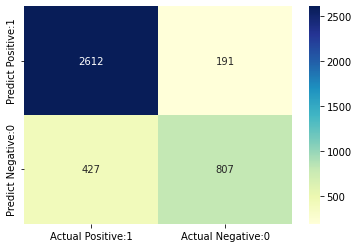

In [112]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Podemos ver que la matriz de confusión está desbalanceada, por lo que vamos a proceder a balancear la misma. 

**Experimento 2:**

Procedemos a balancear la matriz de confusión para aplicar regresión logística

In [121]:
df.head()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,pobreza,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
0,93,1,3,1,1,1,1,1,1,2,2,2,3,1,2,0,0,0,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,0,2,77500,1,2,98,0,0,0,1,1,72,1,2,9,1,1.50,51667.0,0,1,1,1,1,1,2,2,2,1,1,1
1,93,2,2,1,4,1,1,1,1,2,2,2,2,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,4,1,3,85000,2,0,98,0,0,0,1,1,38,1,4,3,0,3.13,27157.0,0,1,1,1,1,2,2,2,2,6,1,1
2,33,1,3,1,4,1,1,1,1,2,2,2,3,3,2,0,0,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,2,2,2,4,0,4,96870,1,2,98,0,0,0,1,1,67,1,4,3,0,3.33,29090.0,0,1,2,3,1,1,2,2,2,1,1,1
3,33,2,2,1,9,1,1,1,1,2,1,2,2,1,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,0,2,90000,1,2,98,0,0,0,1,1,35,1,5,3,0,1.77,50847.0,0,1,1,1,1,2,1,2,2,1,1,1
4,33,1,3,1,1,1,1,1,1,2,2,2,3,2,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,2,2,3,0,3,92000,2,1,98,0,0,0,1,2,33,1,6,3,0,2.54,36220.0,0,1,1,1,1,1,1,2,2,1,1,1


In [113]:
df['pobreza'].value_counts()

0    9197
1    4258
Name: pobreza, dtype: int64

In [114]:
from sklearn.utils import resample

In [115]:
# Separate majority and minority classes
df_majority = df[df.pobreza==0]
df_minority = df[df.pobreza==1]
 
# Upsample minority class
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4258,    # to match majority class
                                 random_state=0) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_upsampled])
 


In [116]:
df_upsampled.pobreza.value_counts()

1    4258
0    4258
Name: pobreza, dtype: int64

In [117]:
X = df_upsampled.drop(['pobreza'], axis=1)

y = df_upsampled['pobreza']

In [118]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [122]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((5961, 70), (2555, 70))

In [123]:
cols = X_train.columns

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [125]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [126]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [127]:
X_train.describe()

,AGLOMERADO,IV1,IV2,IV3,IV4,IV5,IV6,IV7,IV8,IV12_1,IV12_2,IV12_3,II1,II2,II3,II3_1,II5_1,II6_1,V1,V2,V21,V22,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19_A,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,ITF,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4,parentesco,genero,edad,cob_medica,NIVEL_ED,CAT_OCUP,CAT_INAC,AE_ctrol_ind_sum,adulto_equivalente,IV9,IV10,IV11,II4_1,II4_2,II4_3,II5,II6,II7,II8,II9
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.0,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,0.242099,0.039121,0.225260,0.048034,0.237062,0.157859,0.015853,0.010513,0.003691,0.936085,0.937930,0.993122,0.219147,0.321087,0.973327,0.018062,0.003775,0.005955,0.024996,0.078343,0.995135,0.993625,0.124895,0.124539,0.097760,0.115836,0.111978,0.122316,0.124979,0.124623,0.121414,0.112649,0.090169,0.105981,0.109692,0.063475,0.110804,0.124937,0.000168,0.125105,0.171125,0.080607,0.174098,0.019085,0.033617,0.006864,0.685281,0.005052,0.001335,0.001603,0.0,0.476766,0.425124,0.049565,0.435973,0.485342,0.083926,0.183243,0.017787,0.019879,0.029609,0.094895,0.098473,0.567522,0.700554,0.993122,0.988257,0.121603,0.148353,0.015713
std,0.209357,0.096444,0.130635,0.124484,0.239914,0.364640,0.095847,0.065206,0.060644,0.244623,0.241303,0.082655,0.129679,0.142515,0.113855,0.078850,0.046999,0.056519,0.051448,0.061666,0.069585,0.079594,0.012646,0.014292,0.053011,0.034763,0.040066,0.021799,0.012224,0.013923,0.024130,0.039222,0.057341,0.046506,0.042735,0.063661,0.041474,0.012437,0.012952,0.011563,0.136511,0.134278,0.143868,0.019545,0.166912,0.028172,0.459239,0.040450,0.019528,0.032591,0.0,0.499502,0.204087,0.086313,0.259964,0.382068,0.161453,0.132964,0.022681,0.098132,0.124932,0.192025,0.297979,0.495461,0.458054,0.082655,0.107736,0.205470,0.181152,0.097293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.109890,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.111111,0.166667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0.000000,0.125000,0.125000,0.000000,0.125000,0.076923,0.000000,0.100000,0.009668,0.000000,0.000000,0.020619,0.000000,0.000000,0.000000,0.0,0.000000,0.265823,0.000000,0.166667,0.250000,0.000000,0.081232,0.007887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.219780,0.000000,0.222222,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.222222,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,1.000000,0.125000,0.125000,0.125000,0.125000,0.12

In [128]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [129]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 0, ..., 1, 1, 0])

In [130]:
# probability of getting output as 0 - no probreza

logreg.predict_proba(X_test)[:,0]

array([0.29257531, 0.06853448, 0.86154172, ..., 0.25557515, 0.02986241,
       0.57032369])

In [131]:
# probability of getting output as 1 - pobreza

logreg.predict_proba(X_test)[:,1]

array([0.70742469, 0.93146552, 0.13845828, ..., 0.74442485, 0.97013759,
       0.42967631])

**Métricas**

In [132]:
#from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8274


Compare the train-set and test-set accuracy.

In [133]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 1, ..., 0, 1, 1])

In [134]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8156


Check for overfitting and underfitting

In [135]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8156
Test set score: 0.8274


The training-set accuracy score is 0.8671 while the test-set accuracy to be 0.8702. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression,** we use default value of C = 1.** It provides good performance with approximately 85% accuracy on both the training and the test set.

But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

Pero el rendimiento del modelo en el conjunto de entrenamiento y en el de prueba es muy comparable. Es probable que se trate de un caso de infraajuste.

In [137]:
#I will increase C and fit a more flexible model.

# fit (ajustar) the Logsitic Regression model with C=100

# instantiate the model
logreg2000 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg2000.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [138]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9675
Test set score: 0.9683


We can see that, C=2000 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Podemos ver que C=100 da como resultado una mayor precisión en el conjunto de pruebas y también una precisión ligeramente mayor en el conjunto de entrenamiento. Por lo tanto, podemos concluir que un modelo más complejo debería funcionar mejor.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [139]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [140]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7517
Test set score: 0.7620


Por lo tanto, si utilizamos un modelo más regularizado estableciendo C=0,01, tanto la precisión del conjunto de entrenamiento como la del conjunto de prueba disminuyen en relación con los parámetros por defecto.

**Presición nula**

Compare model accuracy with null accuracy So, the model accuracy is 0.8702. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [141]:
y_test.value_counts()

1    1281
0    1274
Name: pobreza, dtype: int64

We can see that the occurences of most frequent class is 2780. So, we can calculate null accuracy by dividing 2780 by total number of occurences.

In [142]:
# check null accuracy score

null_accuracy = (1319/(1319+1292))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5052


We can see that our model accuracy score is 0.8702 but null accuracy score is 0.6886. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels

# **Matriz de confusión**

In [143]:
# Print the Confusion Matrix and slice it into four pieces

#from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1063  211]
 [ 230 1051]]

True Positives(TP) =  1063

True Negatives(TN) =  1051

False Positives(FP) =  211

False Negatives(FN) =  230


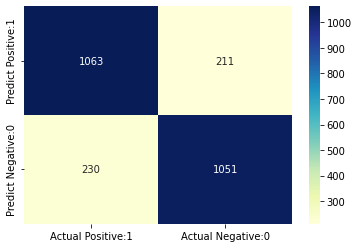

In [144]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [145]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1274
           1       0.83      0.82      0.83      1281

    accuracy                           0.83      2555
   macro avg       0.83      0.83      0.83      2555
weighted avg       0.83      0.83      0.83      2555



In [146]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [147]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8274


In [148]:
#Classification error
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1726


La precisión puede definirse como el porcentaje de resultados positivos predichos correctamente de todos los resultados positivos predichos. 
Puede darse como la relación entre los verdaderos positivos (TP) y la suma de los verdaderos y falsos positivos (TP + FP). S
e refiere más a la clase positiva que a la negativa. Matemáticamente, la precisión puede definirse como la relación entre TP y (TP + FP).


In [149]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8344


Recall
\nRecall puede definirse como el porcentaje de resultados positivos correctamente predichos de todos los resultados positivos reales. \n
Puede darse como la relación entre los verdaderos positivos (TP) y la suma de los verdaderos positivos y los falsos negativos (TP + FN). 
La recuperación también se denomina sensibilidad. La recuperación identifica la proporción de positivos reales predichos correctamente.


In [150]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8221


In [151]:
#True Positive Rate
#True Positive Rate is synonymous with Recall.

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8221


In [152]:
#False Positive Rate

"""el False Positive Rate se define como el ratio entre el número de falsos positivos y el número de negativos (reales). 
Lógicamente, el clasificador ideal tendría un FPR de cero (pues no tendría falsos positivos), y el peor clasificador posible tendría un FPR de uno (todos los negativos reales serían identificados erróneamente como positivos):
"""
false_positive_rate = FP / float(FP + TN)

In [153]:
#Specificity
"""especificidad es el porcentaje de 0’s (reales) correctamente predicho. La especificidad también puede calcularse como 1-Tasa Falsos Positivos.
"""

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8328


In [154]:
#17. Adjusting the threshold level (nivel de umbral)
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.29257531, 0.70742469],
       [0.06853448, 0.93146552],
       [0.86154172, 0.13845828],
       [0.43553199, 0.56446801],
       [0.87823053, 0.12176947],
       [0.24927951, 0.75072049],
       [0.04178925, 0.95821075],
       [0.55664603, 0.44335397],
       [0.22662432, 0.77337568],
       [0.67222531, 0.32777469]])

"""Classification threshold level (Nivel de umbral de clasificación)

There is a classification threshold level of 0.5.

Class 1 - probability of pobreza is predicted if probability > 0.5.

Class 0 - probability of no pobreza is predicted if probability < 0.5."""

In [155]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No POBREZA (0)', 'Prob of - POBREZA (1)'])

y_pred_prob_df

,Prob of - No POBREZA (0),Prob of - POBREZA (1)
0,0.292575,0.707425
1,0.068534,0.931466
2,0.861542,0.138458
3,0.435532,0.564468
4,0.878231,0.121769
5,0.249280,0.750720
6,0.041789,0.958211
7,0.556646,0.443354
8,0.226624,0.773376
9,0.672225,0.327775


In [156]:
# print the first 10 predicted probabilities for class 1 - Probability of POBREZA

logreg.predict_proba(X_test)[0:10, 1]

array([0.70742469, 0.93146552, 0.13845828, 0.56446801, 0.12176947,
       0.75072049, 0.95821075, 0.44335397, 0.77337568, 0.32777469])

In [157]:
# store the predicted probabilities for class 1 - Probability of POBREZA
#almacenar las probabilidades previstas para la clase 1 - Probabilidad de POBREZA

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

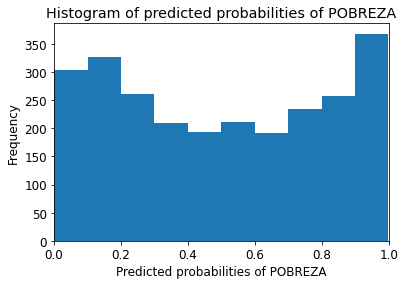

In [158]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of POBREZA')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of POBREZA')
plt.ylabel('Frequency')

Observaciones
Podemos ver que el histograma anterior está muy sesgado positivamente.
La primera columna nos dice que hay aproximadamente 1400 observaciones con una probabilidad entre 0,0 y 0,1.
Hay un pequeño número de observaciones con probabilidad > 0,5.
Por lo tanto, este pequeño número de observaciones predice que habrá pobreza.
La mayoría de las observaciones predicen que no hay pobreza.

**Bajar el umbral**

In [159]:
from sklearn.preprocessing import binarize 


for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,threshold=i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[ 297  977]
 [   3 1278]] 

 with 1575 correct predictions,  

 977 Type I errors( False Positives),  

 3 Type II errors( False Negatives),  

 Accuracy score:  0.6164383561643836 

 Sensitivity:  0.9976580796252927 

 Specificity:  0.23312401883830455 



With 0.2 threshold the Confusion Matrix is  

 [[ 599  675]
 [  28 1253]] 

 with 1852 correct predictions,  

 675 Type I errors( False Positives),  

 28 Type II errors( False Negatives),  

 Accuracy score:  0.724853228962818 

 Sensitivity:  0.9781420765027322 

 Specificity:  0.47017268445839877 



With 0.3 threshold the Confusion Matrix is  

 [[ 821  453]
 [  69 1212]] 

 with 2033 correct predictions,  

 453 Type I errors( False Positives),  

 69 Type II errors( False Negatives),  

 Accuracy score:  0.7956947162426614 

 Sensitivity:  0.9461358313817331 

 Specificity:  0.6444270015698587 



With 0.4 threshold the Confusion Matrix is  

 [[ 967  307]
 [ 130 1151]] 

 with 

Comentarios
En los problemas binarios, el umbral de 0,5 se utiliza por defecto para convertir las probabilidades predichas en predicciones de clase.
El umbral puede ajustarse para aumentar la sensibilidad o la especificidad.
La sensibilidad y la especificidad tienen una relación inversa. El aumento de una de ellas siempre disminuirá la otra y viceversa.
Podemos ver que el aumento del nivel de umbral resulta en un aumento de la precisión.
Ajustar el nivel de umbral debería ser uno de los últimos pasos que se realizan en el proceso de construcción del modelo.


**Curva ROC**

Curva ROC


Otra herramienta para medir visualmente el rendimiento del modelo de clasificación es la curva ROC. 
Curva ROC significa Curva de Característica Operativa del Receptor. 
Una curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en varios niveles de umbral de clasificación.

La curva ROC traza la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) en varios niveles de umbral.

La tasa de verdaderos positivos (TPR) también se denomina recuperación. Se define como la relación entre TP y (TP + FN).

La tasa de falsos positivos (FPR) se define como la relación entre FP y (FP + TN).

En la curva ROC, nos centraremos en la TPR (tasa de verdaderos positivos) y la FPR (tasa de falsos positivos) de un solo punto. 
Esto nos dará el rendimiento general de la curva ROC que consiste en el TPR y el FPR en varios niveles de umbral. Así, una curva ROC traza el TPR frente al FPR a diferentes niveles de umbral de clasificación. Si bajamos los niveles de umbral, puede que se clasifiquen más elementos como positivos. Aumentará tanto los Verdaderos Positivos (TP) como los Falsos Positivos (FP).


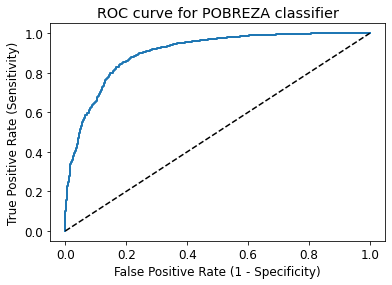

In [160]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for POBREZA classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [161]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9027


Comentarios

El AUC del ROC es un resumen numérico del rendimiento del clasificador. Cuanto mayor sea el valor, mejor será el clasificador.

El ROC AUC de nuestro modelo se aproxima a 1. Por lo tanto, podemos concluir que nuestro clasificador hace un buen trabajo al predecir si HAY POBREZA o no.

In [162]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8888


In [163]:
#19. k-Fold Cross Validation (Validación cruzada k-fold )
# Applying 5-Fold Cross Validation (Aplicación de la validación cruzada por quintuplicado)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80720872 0.78439597 0.79530201 0.8397651  0.8045302 ]


In [164]:
#Podemos resumir la precisión de la validación cruzada calculando su media.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8062


La puntuación del modelo original es de 0,87. 
La puntuación media de la validación cruzada es de 0,8573. 
Por lo tanto, podemos concluir que la validación cruzada no mejora el rendimiento.

**Optimización de hiperparámetros mediante GridSearch CV**

In [166]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [167]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9827


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=0, solver='liblinear')


In [168]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9836


Comentarios
La precisión de la prueba de nuestro modelo original es de 0,87, mientras que la precisión de GridSearch CV es de 0,9948.
Podemos ver que GridSearch CV mejora el rendimiento de este modelo en particular.